In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1.1 ЗАГРУЗКА ДАННЫХ

Данные загружены. Представлен код по загрузке, отражено в отчете. Результаты очищены от технической информации, отражено в отчете.

1.2 ПРЕДОБРАБОТКА ДАННЫХ

Необходимо проанализировать значения атрибутов датасета, проанализировать значения, которыми заполнены признаки и обработать их при необходимости, отразить в отчете.

# Модуль 1

## 1.1 ЗАГРУЗКА ДАННЫХ

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML&BD/data/real_estate_data.csv") # загрузка данных

In [ ]:
df.head() 

,id,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,furnished,heating_type,price,price_currency
0,1,Konut,Rezidans,12/10/18,1/9/19,2,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,3500.0,TRY
1,2,Konut,Daire,2/13/19,NaN,1,14,0,20 ve üzeri,20 ve üzeri,1+0,43.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,490000.0,TRY
2,3,Konut,Daire,10/9/18,11/8/18,1,30,0,1,Yüksek Giriş,2+1,NaN,Tekirdağ/Çorlu/Reşadiye,NaN,Fancoil,155000.0,TRY
3,4,Konut,Rezidans,9/10/18,10/10/18,1,30,3,20 ve üzeri,20 ve üzeri,6+1,450.0,İstanbul/Beşiktaş/Levent,NaN,Fancoil,32500000.0,TRY
4,5,Konut,Rezidans,12/10/18,1/9/19,1,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,1450000.0,TRY


Данные были загружены, код представлен

## 1.2 ПРЕДОБРАБОТКА ДАННЫХ


In [ ]:
df.shape # размерность массива данных

(403487, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403487 entries, 0 to 403486
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 403487 non-null  int64  
 1   type               403487 non-null  object 
 2   sub_type           403487 non-null  object 
 3   start_date         403487 non-null  object 
 4   end_date           266298 non-null  object 
 5   listing_type       403487 non-null  int64  
 6   tom                403487 non-null  int64  
 7   building_age       376097 non-null  object 
 8   total_floor_count  375466 non-null  object 
 9   floor_no           368191 non-null  object 
 10  room_count         403487 non-null  object 
 11  size               257481 non-null  float64
 12  address            403487 non-null  object 
 13  furnished          0 non-null       float64
 14  heating_type       375517 non-null  object 
 15  price              402772 non-null  float64
 16  pr

Имеем 3 признака с типом данных float64, 3 признака с типо данных int64 и 11 признаков с типом данных object.

Также можно заметить, что столбец furnished (мебельный) полностью заполнен пропусками данных (NaN)

Давайте проверим количество пустых значений в остальных столбцах

In [ ]:
df.isna().sum() # смотрим на пустые значения в столбцах

id                        0
type                      0
sub_type                  0
start_date                0
end_date             137189
listing_type              0
tom                       0
building_age          27390
total_floor_count     28021
floor_no              35296
room_count                0
size                 146006
address                   0
furnished            403487
heating_type          27970
price                   715
price_currency          715
dtype: int64

В столбцах end_date, building_age, total_floor_count, floor_no, size, heating_type, price, price_currency

Удалим столбец furnished

In [ ]:
df.drop("furnished", axis = 1, inplace = True)

Также отбросим столбцы с датами

In [ ]:
df.drop(["end_date", "start_date"], axis = 1, inplace = True)

Остальные столбцы попробуем обработать

In [ ]:
df["total_floor_count"].value_counts()

4              83082
3              77956
5              70104
10-20 arası    36512
2              27742
6              23348
10             12558
7              12284
8              11207
9               9029
20 ve üzeri     6679
1               4965
Name: total_floor_count, dtype: int64

 Столбец total_floor_count обработаем с помощью замены строк на числовой формат

In [ ]:
df["total_floor_count"].replace("10-20 arası", 15, inplace = True) # заменяем строку 10-20 на 15

In [ ]:
df["total_floor_count"].value_counts()

4              83082
3              77956
5              70104
15             36512
2              27742
6              23348
10             12558
7              12284
8              11207
9               9029
20 ve üzeri     6679
1               4965
Name: total_floor_count, dtype: int64

In [ ]:
df["total_floor_count"].replace("20 ve üzeri", 20, inplace = True) # заменяем строку 20 ve uzeri на 20

In [ ]:
# заменяем пустые значения
df["total_floor_count"].fillna(df["total_floor_count"].median(), inplace = True)

In [ ]:
df["total_floor_count"] = df["total_floor_count"].astype("int64") # поменяли тип столбца

Обработали столбец количества этажей

Перейдем к обработке столбца building_age

In [ ]:
df["building_age"].value_counts() # смотрим распределение переменной

0              140174
6-10 arası      50495
11-15 arası     32309
16-20 arası     31333
1               20355
4               19032
21-25 arası     18438
2               17466
3               15651
5               13589
26-30 arası     10581
31-35 arası      4268
36-40 arası      1347
40 ve üzeri      1059
Name: building_age, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
df["building_age"] = le.fit_transform(df["building_age"].astype(str)) # кодируем столбец

In [ ]:
df["building_age"].value_counts()

0     140174
13     50495
2      32309
3      31333
14     27390
1      20355
10     19032
5      18438
4      17466
7      15651
12     13589
6      10581
8       4268
9       1347
11      1059
Name: building_age, dtype: int64

In [ ]:
le.classes_

array(['0', '1', '11-15 arası', '16-20 arası', '2', '21-25 arası',
       '26-30 arası', '3', '31-35 arası', '36-40 arası', '4',
       '40 ve üzeri', '5', '6-10 arası', 'nan'], dtype=object)

Обработали столбец возраст здания

Переходим к столбцу floor_no

In [ ]:
df["floor_no"].value_counts()

2               60914
3               32200
1               28569
Yüksek Giriş    24045
Müstakil        21165
4               21049
3               20490
Bahçe katı      19065
1               18187
4               13416
5               12495
Giriş Katı      10431
5                8698
6                5116
Kot 1            5036
Kot 2            4987
2                4950
9                4855
6                4631
8                4608
7                4398
10               3863
Kot 3            3793
Çatı Katı        3566
Zemin Kat        3441
7                3300
Komple           2958
11               2894
12               2308
Kot 4            2269
13               1702
20 ve üzeri      1563
8                1491
14               1328
15                911
En Üst Kat        894
Bodrum Kat        815
16                600
17                373
18                334
Teras Kat         293
19                177
Asma Kat           12
12                  1
Name: floor_no, dtype: int64

 Столбец ["floor_no"] мы считаем не информативным. Он может зашумить нашу модель и данные. Поэтому принимаем решение удалить его.

In [ ]:
df.drop("floor_no", axis =1, inplace = True)

Переходим к следующему признаку - size

In [ ]:
df["size"].value_counts()

90.0       16803
100.0      16234
120.0      15543
110.0      13546
80.0       11094
           ...  
1736.0         1
447.0          1
891.0          1
1385.0         1
42262.0        1
Name: size, Length: 943, dtype: int64

In [ ]:
quant = df["size"].quantile(0.9)# считаем квантиль 90 %
quant_low = df["size"].quantile(0.1)# считаем квантиль 10 %

In [ ]:
df_new = df[df["size"] < quant] # убираем выбросы по квантилю
df_new = df_new[df_new["size"] > quant_low] # убираем выбросы по квантилю

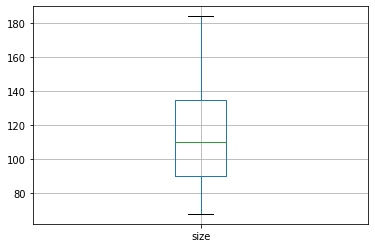

In [ ]:
df_new.boxplot("size") # строим ящик с усами и показываем, что выбросов практически нет

In [ ]:
df_new[df_new["size"] < quant]["size"].max() # считаем максимум

184.0

In [ ]:
df_new["size"].value_counts()

90.0     16803
100.0    16234
120.0    15543
110.0    13546
80.0     11094
         ...  
141.0       54
173.0       52
182.0       49
171.0       36
181.0       26
Name: size, Length: 117, dtype: int64

In [ ]:
df_new.isna().sum() # пустых значений нет

id                       0
type                     0
sub_type                 0
listing_type             0
tom                      0
building_age             0
total_floor_count        0
room_count               0
size                     0
address                  0
heating_type         10060
price                   87
price_currency          87
dtype: int64

Теперь этот признак хороший!

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205562 entries, 0 to 403486
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 205562 non-null  int64  
 1   type               205562 non-null  object 
 2   sub_type           205562 non-null  object 
 3   listing_type       205562 non-null  int64  
 4   tom                205562 non-null  int64  
 5   building_age       205562 non-null  int64  
 6   total_floor_count  205562 non-null  int64  
 7   room_count         205562 non-null  object 
 8   size               205562 non-null  float64
 9   address            205562 non-null  object 
 10  heating_type       195502 non-null  object 
 11  price              205475 non-null  float64
 12  price_currency     205475 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 22.0+ MB


In [ ]:
df_new["heating_type"].value_counts()

Kombi (Doğalgaz)                   108393
Klima                               34552
Merkezi Sistem (Isı Payı Ölçer)     15281
Merkezi Sistem                      11682
Kalorifer (Doğalgaz)                 6454
Soba (Kömür)                         4470
Yerden Isıtma                        2934
Yok                                  2896
Kat Kaloriferi                       2827
Kombi (Elektrikli)                   1792
Soba (Doğalgaz)                      1489
Güneş Enerjisi                        875
Jeotermal                             779
Kalorifer (Kömür)                     738
Kalorifer (Akaryakıt)                 183
Fancoil                               157
Name: heating_type, dtype: int64

In [ ]:
df_new["heating_type"].fillna("Kombi (Doğalgaz)", inplace = True) # заменяем пропуски на часто встречаемое

In [ ]:
df_new["heating_type"] = le.fit_transform(df_new["heating_type"]) # кодируем переменную

In [ ]:
df_new["heating_type"].value_counts()

8     118453
7      34552
11     15281
10     11682
4       6454
13      4470
14      2934
15      2896
6       2827
9       1792
12      1489
1        875
2        779
5        738
3        183
0        157
Name: heating_type, dtype: int64

Переходим к признаку price

In [ ]:
df_new['price'].value_counts()

1000.0      4461
1500.0      3029
1200.0      2920
1100.0      2714
800.0       2625
            ... 
4999.0         1
451000.0       1
319900.0       1
79900.0        1
0.0            1
Name: price, Length: 2441, dtype: int64

In [ ]:
df_new["price"].fillna(df_new["price"].median(), inplace = True)

Вывод: столбец price содержит большое количество выбросов. Мы не можем взять его для нашей модели классификации.

In [ ]:
df_new["price_currency"].value_counts()

TRY    205016
EUR       201
GBP       200
USD        58
Name: price_currency, dtype: int64

Заменим пустые значения самым часто-встречающимся.

In [ ]:
df_new["price_currency"].fillna("TRY", inplace = True)

кодируем значения столбца с помощью LabelEncodera

In [ ]:
df_new["price_currency"] = le.fit_transform(df_new["price_currency"])

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205562 entries, 0 to 403486
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 205562 non-null  int64  
 1   type               205562 non-null  object 
 2   sub_type           205562 non-null  object 
 3   listing_type       205562 non-null  int64  
 4   tom                205562 non-null  int64  
 5   building_age       205562 non-null  int64  
 6   total_floor_count  205562 non-null  int64  
 7   room_count         205562 non-null  object 
 8   size               205562 non-null  float64
 9   address            205562 non-null  object 
 10  heating_type       205562 non-null  int64  
 11  price              205562 non-null  float64
 12  price_currency     205562 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 22.0+ MB


Переходим к столбцу type

In [ ]:
df_new["type"].value_counts()

Konut    205562
Name: type, dtype: int64

Так как в столбце type лишь одно уникальное значение, мы его можем удалить из данных

In [ ]:
df_new.drop("type", axis = 1, inplace = True)

Переходим к столбцу sub_type

In [ ]:
df_new["sub_type"].value_counts()

Daire                  188440
Villa                    6226
Müstakil Ev              3629
Yazlık                   3031
Rezidans                 3016
Komple Bina               652
Prefabrik Ev              309
Yalı Dairesi               81
Çiftlik Evi                80
Kooperatif                 50
Köşk / Konak / Yalı        32
Loft                       16
Name: sub_type, dtype: int64

Закодируем переменную с помощью кодировщика

In [ ]:
df_new["sub_type"] = le.fit_transform(df_new["sub_type"]) # кодируем переменное

In [ ]:
df_new["sub_type"].value_counts()

0     188440
8       6226
5       3629
10      3031
7       3016
1        652
6        309
9         81
11        80
2         50
3         32
4         16
Name: sub_type, dtype: int64

Переходим к признаку listing_type

Смотрим на распределение по уникальным

In [ ]:
df_new["listing_type"].value_counts()

1    148252
2     56621
3       689
Name: listing_type, dtype: int64

Исходя из того, что есть 3 уникальных значения мы оставляем этот столбец

Переходим к признаку tom

Смотрим на распределение по уникальным

In [ ]:
df_new["tom"].value_counts()

30     44022
60     11378
0       5764
90      4605
61      3498
       ...  
166       31
174       30
177       26
171       17
178        7
Name: tom, Length: 181, dtype: int64

Исходя из того, что есть 181 уникальных значения мы оставляем этот столбец

Переходим к признаку room_count

Смотрим на распределение по уникальным

In [ ]:
df_new["room_count"].value_counts()

3+1     95793
2+1     85135
4+1     13926
1+1      5743
5+1      1245
3+2      1185
4+2      1174
2+2       461
+         408
5+2       184
1+0        97
6+1        89
6+2        40
10+0       14
6+3        14
7+1        14
4+3        12
8+2         6
7+2         5
5+3         3
8+1         3
8+4         2
9+1         2
7+3         2
9+3         2
10+1        1
9+5         1
8+3         1
Name: room_count, dtype: int64

In [ ]:
df_new["room_count"] = le.fit_transform(df_new["room_count"])

Закодировали этот признак с помощью Кодировщика

Удалим признак id

In [ ]:
df_new.drop("id", axis = 1, inplace = True)

Переходим к признаку adress

In [ ]:
df_new["address"].value_counts()

Balıkesir/Edremit/Akçay              3427
İstanbul/Beylikdüzü/Cumhuriyet       2160
Aydın/Didim/Efeler                   2121
İstanbul/Başakşehir/Kayabaşı         1298
İstanbul/Bahçelievler/Siyavuşpaşa    1188
                                     ... 
Kastamonu/Taşköprü/Tekke                1
Mersin/Tarsus/Yaramış                   1
Hatay/Dörtyol/Karakese                  1
Ankara/Çankaya/Oğuzlar                  1
Samsun/Havza/İcadiye                    1
Name: address, Length: 6240, dtype: int64

В столбце слишком много уникальных значений, что привнесет шум в нашу модель и данные. Необходимо удалить этот столбец

In [ ]:
df_new.drop("address", axis = 1, inplace = True)

In [ ]:
df_new

,sub_type,listing_type,tom,building_age,total_floor_count,room_count,size,heating_type,price,price_currency
0,7,2,30,0,20,5,90.0,0,3500.0,2
4,7,1,30,0,20,5,90.0,0,1450000.0,2
6,0,2,54,0,20,7,160.0,0,3750.0,2
8,0,1,11,14,2,7,140.0,0,1500000.0,2
10,5,1,13,0,1,7,125.0,0,2450000.0,2
...,...,...,...,...,...,...,...,...,...,...
403452,0,2,7,14,4,9,165.0,8,900.0,2
403468,0,2,2,14,4,5,90.0,8,800.0,2
403475,0,1,0,14,4,7,100.0,8,600000.0,2
403476,0,1,16,14,4,7,110.0,8,200000.0,2


# Модуль 2


2.1 ОТБОР ПРИЗНАКОВ
Необходимо определить, какие признаки имеют наибольшее влияние на классификацию объектов по возрасту недвижимости (building_age) и оставить только их для обучения. Могут остаться и все исходные признаки. Необходимо обосновать выбор признаков, оставленных для обучения.

2.2 РАЗБИЕНИЕ ОБРАБОТАННЫХ ДАННЫХ НА ОБУЧАЮЩУЮ И ТЕСТИРУЮЩУЮ ВЫБОРКИ
Необходимо определить принцип разделения данных на обучающую и тестовую выборки. Даже если вы выбираете случайное разделение данных, необходимо обосновать выбор данного принципа.

2.3 КЛАССИФИФКАЦИЯ ОБЪЕКТОВ
Необходимо выбрать модель классификации недвижимости по возрасту недвижимости (building_age), обосновать выбор модели. Необходимо обучить модель на обучающей выборке и протестировать. Необходимо предоставить показатели точности работы выбранной модели и всех рассматриваемых.


## 2.1 ОТБОР ПРИЗНАКОВ

Признаки были отобраны уже на предыдущем этапе.
Можете просто еще раз продублировать всю последовательность действий.
Также можно обучить алгоритм и построить график важности признаков и показать, что все отобранные признаки влияют на конечный результат классификации.

## 2.2 РАЗБИЕНИЕ ОБРАБОТАННЫХ ДАННЫХ НА ОБУЧАЮЩУЮ И ТЕСТИРУЮЩУЮ ВЫБОРКИ

In [ ]:
X = df_new.drop("building_age", axis = 1)
y = df_new["building_age"]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## 2.1 ОТБОР ПРИЗНАКОВ (продолжение)

In [ ]:
from xgboost import XGBClassifier, plot_importance, plot_tree

In [ ]:
xgb_cls = XGBClassifier(n_estimators = 100, learning_rate = 0.3, n_jobs = -1, random_state = 1)

In [ ]:
xgb_cls.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = xgb_cls.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.43      0.94      0.59     22403
           1       0.49      0.01      0.02      2948
           2       0.27      0.09      0.13      4970
           3       0.24      0.14      0.18      5275
           4       0.66      0.01      0.02      2516
           5       0.28      0.04      0.08      3232
           6       0.25      0.05      0.08      1794
           7       0.52      0.01      0.03      2153
           8       0.30      0.02      0.04       732
           9       0.43      0.03      0.06       204
          10       0.42      0.01      0.01      2556
          11       0.23      0.06      0.09       119
          12       0.25      0.00      0.00      1996
          13       0.24      0.12      0.16      7755
          14       0.34      0.34      0.34      3016

    accuracy                           0.40     61669
   macro avg       0.36      0.12      0.12     61669
weighted avg       0.37   

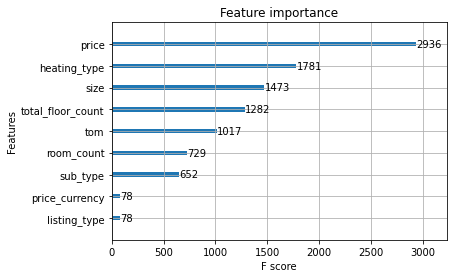

In [ ]:
plot_importance(xgb_cls) # отбор признаков с помощью алгоритма

По графику важности признаков можно заметить, что признаки price_currency и listing_type не оказывают большого влияния на классификацию, значит, их можно удалить.

In [ ]:
df_n = df_new.drop(["price_currency", "listing_type"], axis = 1)
X = df_n.drop("building_age", axis = 1)
y = df_n["building_age"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## 2.3 КЛАССИФИФКАЦИЯ ОБЪЕКТОВ

In [ ]:
from xgboost import XGBClassifier, plot_importance, plot_tree

In [ ]:
xgb_cls = XGBClassifier(n_estimators = 100, learning_rate = 0.3, n_jobs = -1, random_state = 1)

In [ ]:
xgb_cls.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = xgb_cls.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.43      0.94      0.59     22403
           1       0.45      0.01      0.02      2948
           2       0.26      0.09      0.13      4970
           3       0.24      0.14      0.18      5275
           4       0.62      0.01      0.02      2516
           5       0.30      0.04      0.08      3232
           6       0.24      0.04      0.08      1794
           7       0.50      0.01      0.03      2153
           8       0.26      0.02      0.04       732
           9       0.58      0.03      0.06       204
          10       0.34      0.01      0.01      2556
          11       0.26      0.05      0.08       119
          12       0.73      0.00      0.01      1996
          13       0.24      0.12      0.16      7755
          14       0.34      0.34      0.34      3016

    accuracy                           0.40     61669
   macro avg       0.39      0.12      0.12     61669
weighted avg       0.37   

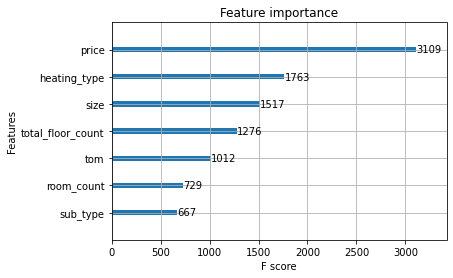

In [ ]:
plot_importance(xgb_cls) # отбор признаков с помощью алгоритма

# Модуль 3

3.1 ОТБОР ПРИЗНАКОВ
Необходимо определить, какие признаки имеют наибольшее влияние цены на недвижимость (price) и оставить только их для обучения. Могут остаться и все исходные признаки. Необходимо обосновать выбор признаков, оставленных для обучения.

3.2 РАЗБИЕНИЕ ДАННЫХ НА ОБУЧАЮЩУЮ И ТЕСТИРУЮЩУЮ ВЫБОРКИ
Необходимо определить принцип разделения данных на обучающую и тестирующую выборки. Даже если вы выбираете случайное разделение данных, необходимо обосновать выбор данного принципа.

3.3 ПРОГНОЗИРОВАНИЕ
Необходимо выбрать модель прогнозирования цен на недвижимость (price), обосновать выбор модели. Необходимо обучить модель на обучающей выборке и протестировать. После тестирования необходимо оценить точность работы выбранной модели.


## 3.1 ОТБОР ПРИЗНАКОВ

## 3.2 РАЗБИЕНИЕ ДАННЫХ НА ОБУЧАЮЩУЮ И ТЕСТИРУЮЩУЮ ВЫБОРКИ

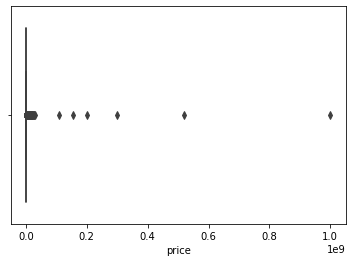

In [ ]:
sns.boxplot(df_new.price)

In [ ]:
quant = df_new["price"].quantile(0.6)# считаем квантиль 90 %
quant_low = df_new["price"].quantile(0.01)# считаем квантиль 10 %

In [ ]:
df2 = df_new[df_new["price"] < quant] # убираем выбросы по квантилю
df2 = df2[df2["price"] > quant_low] # убираем выбросы по квантилю

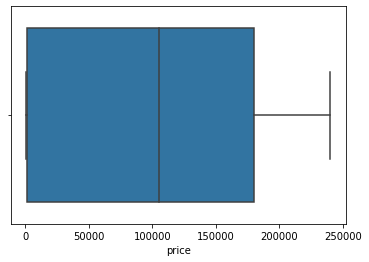

In [ ]:
sns.boxplot(df2.price)

In [ ]:
X = df2.drop("price", axis = 1)
y = df2["price"]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## 3.3 ПРОГНОЗИРОВАНИЕ

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb_regr = XGBRegressor(n_estimators = 1000, learning_rate = 0.1, n_jobs = -1, random_state = 1)

In [ ]:
xgb_regr.fit(x_train, y_train)

[06:32:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = xgb_regr.predict(x_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

28624.117963550816

In [ ]:
r2_score(y_test, y_pred)

0.8993841922825969